### 1.1
Go to https://www.kaggle.com/PromptCloudHQ/imdb-data and download the **IMDB-MovieData.csv**.

Read the data into a DataFrame called **movies** and get the number of columns and rows.

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np
# # Leaving this code for my preferential use
# Mounting my Google Drive so data can be read from it
drive.mount("/content/drive/", force_remount = True) 
movies = pd.read_csv("/content/drive/My Drive/!proj/first_python_cw/IMDB-Movie-Data.csv")

# For the purpose of this assignment, however, the below was used to read the data
# movies = pd.read_csv("IMDB-Movie-Data.csv")

# Using the shape method to get the number of rows and columns, and wrapping
# it up in a sentence for legibility
print("There are " + str(movies.shape[0]) + " rows and " + str(movies.shape[1]) + " columns in this DataFrame.\n")
# Also printing the first five lines and the variable types for exploration of
# the dataset
print(movies.head())
print(movies.dtypes)

Mounted at /content/drive/
There are 1000 rows and 12 columns in this DataFrame.

   Rank                    Title  ... Revenue (Millions) Metascore
0     1  Guardians of the Galaxy  ...             333.13      76.0
1     2               Prometheus  ...             126.46      65.0
2     3                    Split  ...             138.12      62.0
3     4                     Sing  ...             270.32      59.0
4     5            Suicide Squad  ...             325.02      40.0

[5 rows x 12 columns]
Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object


### 1.2
Get the minimum, maximum, and mean value of each numerical column.

In [2]:
# One can choose to print all minimum values, all maximum values and all means,
# separately, or, as line 8,  in one single output
# Uncomment line 4 to 6 if wishing to see the values separately
# print(movies.min(numeric_only = True))
# print(movies.max(numeric_only = True))
# print(movies.mean(numeric_only = True))

desc = movies.describe().loc[["min", "max", "mean"]]
desc

Rank      Year  ...  Revenue (Millions)   Metascore
min      1.0  2006.000  ...            0.000000   11.000000
max   1000.0  2016.000  ...          936.630000  100.000000
mean   500.5  2012.783  ...           82.956376   58.985043

[3 rows x 7 columns]

### 1.3
Rename **Runtime (Minutes)** to **Runtime_Minutes** and **Revenue (Millions)** to **Revenue_Millions**, respectively.

In [3]:
movies = movies.rename(columns = {"Runtime (Minutes)": "Runtime_Minutes", "Revenue (Millions)": "Revenue_Millions"})
# Printing columns names to check changes have been applied
print(movies.columns)

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime_Minutes', 'Rating', 'Votes', 'Revenue_Millions', 'Metascore'],
      dtype='object')


## 2
Find all null values in the DataFrame **movies**. Fill the null values with the mean value of the corresponding column and produce a cleaned DataFrame called **clean_movies**. Please note that all the following tasks will be using **clean_movies**.

In [4]:
# Printing the total of missing values per variable to see where to apply the fill
print(movies.isna().sum())
# Apply the fill
clean_movies = movies.fillna(value = {"Revenue_Millions": movies.Revenue_Millions.mean(), "Metascore": movies.Metascore.mean()})
# Printing the total of missing values again to check the changes have been applied
print(clean_movies.isna().sum())

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime_Minutes       0
Rating                0
Votes                 0
Revenue_Millions    128
Metascore            64
dtype: int64
Rank                0
Title               0
Genre               0
Description         0
Director            0
Actors              0
Year                0
Runtime_Minutes     0
Rating              0
Votes               0
Revenue_Millions    0
Metascore           0
dtype: int64


## 3
Create a histogram to illustrate the distribution of the **Runtime**. Please set the bin size to 10.

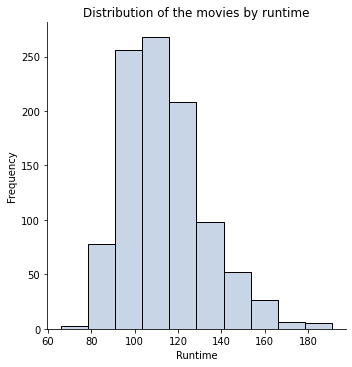

<Figure size 432x288 with 0 Axes>

In [5]:
# Using seaborn throughout this notebook as this allows some advanced features
# needed later, in a more natural way if one is used to working with ggplot in R
# Here displot is appropriate for distributions
sbn.displot(x = "Runtime_Minutes",
# Line 4 for example the dataset does not need to be stipulated when defining
# the variable, as the dataset is passed into the `data` argument (line 7)
           data = clean_movies,
           bins = 10,
# Fixes the number of bins; can replace with binwidth if one wants to fix the
# bin width instead
           color = "lightsteelblue",
# Colour names can be found at https://matplotlib.org/3.1.0/gallery/color/named_colors.html
# if one wants to change the bar fill (line 11) or the edge (line 14) 
           edgecolor = "black",
           alpha = .7)
# Titles and labels can be set with matplotlib even when using seaborn
plt.title("Distribution of the movies by runtime")
plt.xlabel("Runtime")
plt.ylabel("Frequency")
plt.show()
plt.clf()

## 4
Rank the **Directors** according to their average **Rating**. Select the top ten **Directors** and draw a proper chart to compare their average **Rating**.


                             Director  Rating
465                     Nitesh Tiwari    8.80
108                 Christopher Nolan    8.68
392                    Makoto Shinkai    8.60
470                   Olivier Nakache    8.60
194  Florian Henckel von Donnersmarck    8.50
0                          Aamir Khan    8.50
122                   Damien Chazelle    8.40
452                      Naoko Yamada    8.40
508                   Rajkumar Hirani    8.30
377                       Lee Unkrich    8.30


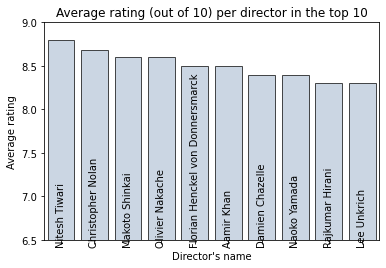

                             Director  Rating  dir_rank
465                     Nitesh Tiwari    8.80       1.0
108                 Christopher Nolan    8.68       2.0
392                    Makoto Shinkai    8.60       3.0
470                   Olivier Nakache    8.60       3.0
194  Florian Henckel von Donnersmarck    8.50       5.0
0                          Aamir Khan    8.50       5.0
122                   Damien Chazelle    8.40       7.0
452                      Naoko Yamada    8.40       7.0
508                   Rajkumar Hirani    8.30       9.0
377                       Lee Unkrich    8.30       9.0
604                 Thomas Vinterberg    8.30       9.0
543                    S.S. Rajamouli    8.30       9.0
25                      Amber Tamblyn    8.30       9.0


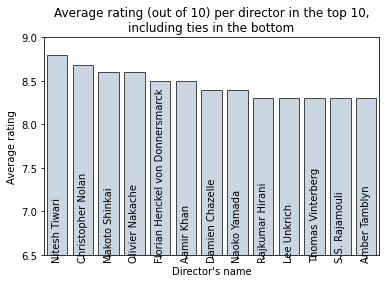

<Figure size 432x288 with 0 Axes>

In [6]:
# Using `groupby` to get the mean rating per director
director_ratings = clean_movies.groupby("Director").Rating.mean().reset_index()
# Then extracting only the top 10 averages
director_ratings_top10 = director_ratings.sort_values("Rating", ascending = False).head(10)
# Printing to check
print(director_ratings_top10)
# NB: it should be noted that the bottom of the top 10 has tied values and it is
# not impossible that directors beyond the first 10 rows have the same values

# Seaborn and arguments used as for the previous histogram
# Here a barplot is appropriate to display a count of values per level of a
# categorical variable
sbn.barplot(x = "Director",
           y = "Rating",
           data = director_ratings_top10,
           color = "lightsteelblue",
           edgecolor = "black",
           alpha = .7)
plt.xticks(rotation = "vertical", verticalalignment = "bottom")
# The tick alignment here avoid having very long tick labels below the chart
plt.title("Average rating (out of 10) per director in the top 10")
plt.xlabel("Director's name")
plt.ylabel("Average rating")
plt.ylim(6.5, 9)
# Setting the y axes to focus on the highest values to make the differences
# between each top director's average ratings more salient
plt.show()
plt.clf()

# To check that ties have not been excluded unfairly, we suggest that the average
# ratings are sorted again, and ranks are produced; the `min` method of ranking
# will give the most top rank to all of the ties
director_ratings_sorted = director_ratings.sort_values("Rating", ascending = False)
director_ratings_sorted["dir_rank"] = director_ratings_sorted.Rating.rank(method = "min", ascending = False)
# Then the 9 top ranks can be extracted to make sure to capture the ties in the
# bottom of the top 10
director_ratings_10ranks = director_ratings_sorted[director_ratings_sorted.dir_rank < 10]
# Printing this subset to check if indeed some ties were excluded in the above
# graph
print(director_ratings_10ranks)
# They were, therefore adding a graph where more than 10 directors are selected,
# accounting for ties by selecting the 10 top ranks
sbn.barplot(x = "Director",
        y = "Rating",
        data = director_ratings_10ranks,
        color = "lightsteelblue",
        edgecolor = "black",
        alpha = .7)
plt.xticks(rotation = "vertical", verticalalignment = "bottom")
plt.title("Average rating (out of 10) per director in the top 10,\nincluding ties in the bottom")
plt.xlabel("Director's name")
plt.ylabel("Average rating")
plt.ylim(6.5, 9)
# Setting the y axes to focus on the highest values to make the differences
# between each top director's average rating more salient
plt.show()
plt.clf()

### 5.1
Use **NumPy** to generate three random integers as indices.


In [7]:
# Generating the three random integers and assigning them as list for later
# manipulation
rand_index = list(np.random.randint(low = 1, high = 1000, size = 3, dtype = "int"))
print(rand_index)

[862, 885, 65]


### 5.2
Use the generated three indices to select the corresponding three **Directors**.

In [8]:
# Using a `for` loop to iterate through whichever number of indices has been
# generated, identify the director that correspond in the DataFrame, and append
# it to a list of director names
rand_dir = []
for i in rand_index:
  rand_dir.append(clean_movies.Director.values[i])
# Using the list of director names to subset the movies DataFrame so only the
# movies from the directors randomly selected through the indices are included
directors_subset = clean_movies[clean_movies.Director.isin(rand_dir)]
directors_subset = pd.DataFrame(directors_subset)

# Printing both the list of randomly selected directors and the list of unique
# director names in the subset to visually check that the subsetting was
# applied appropriately
print(rand_dir)
print(directors_subset.Director.unique())
# Calling the DataFrame simply for inspection
directors_subset

['Miguel Arteta', 'Alejandro González Iñárritu', 'Matthew Vaughn']
['Matthew Vaughn' 'Alejandro González Iñárritu' 'Miguel Arteta']


Rank  ... Metascore
65     66  ...      58.0
129   130  ...      76.0
205   206  ...      65.0
219   220  ...      66.0
260   261  ...      88.0
346   347  ...      66.0
862   863  ...      54.0
885   886  ...      69.0

[8 rows x 12 columns]

### 5.3
Calculate the annual **Metascore** of the selected three **Directors**.

In [9]:
# Using groupby with the director and year variables to produce the sum and print
# it directly
print(directors_subset.groupby(["Director", "Year"]).agg({"Metascore": ["sum"]}))

                                 Metascore
                                       sum
Director                    Year          
Alejandro González Iñárritu 2006      69.0
                            2014      88.0
                            2015      76.0
Matthew Vaughn              2007      66.0
                            2010      66.0
                            2011      65.0
                            2014      58.0
Miguel Arteta               2014      54.0


### 5.4
Use three subplots to illustrate their **Metascore** by year. The range of the x-axis should be from 2006 to 2016.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


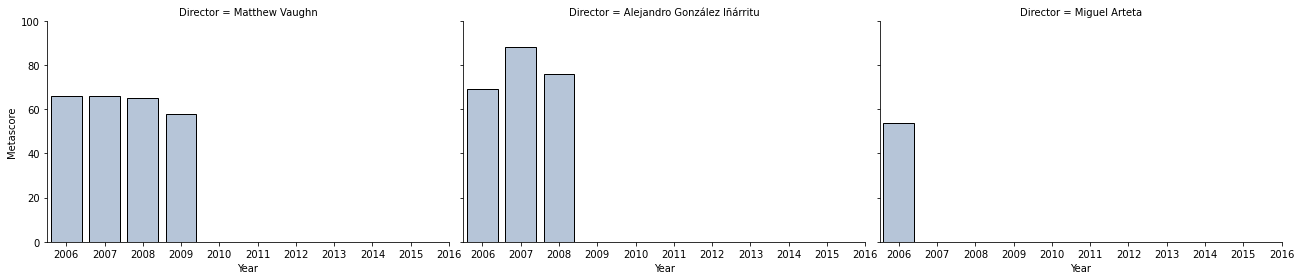

In [10]:
# Since we are working in seaborn, we can use `FacetGrid` for subplotting; it is
# a particularly attractive option as it automatically adds a subtitle to each
# subplot, indicating which level of the subplotting variable is used
# specifically in each subplot
g1 = sbn.FacetGrid(directors_subset,
                  col = "Director",
                  height = 4,
                  aspect = 1.5,
                  sharex = False,
# Setting `sharex` as `False` ensures that each subplot uses the full range of
# values available in the subset, and not just the values common to all subplots
                  ylim = (0, 100)
# Setting the y axis limit as 0 to 100 as 100 is the maximum metascore possible
)
# Then the appropriate plot, here a bar chart, is mapped onto the grid 
g1.map(sbn.barplot,
      "Year",
      "Metascore",
      ci = None,
      color = "lightsteelblue",
      edgecolor = "black")
# The below allows to force the x axis to be from 2006 to 2016, even if all years
# are not represented in the subset
# It needs to be repeated for each set of subplot axes, so the `for` loop allows
# to program this
tick_labels = ["2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016"]
for i in range(len(directors_subset.Director.unique())):
  g1.axes[0, i].set_xticks(range(11))
  g1.axes[0, i].set_xticklabels(tick_labels)

## 6
Use **Revenue** and **Metascore** to select samples that satisfy some conditions (the selection should include three conditional operators and two logical operators). Based on the selected samples, draw a scatter chart to show the relationship between **Revenue** and **Metascore**.

(259, 12)
58.98504273504273 60.375 281.2994999999999


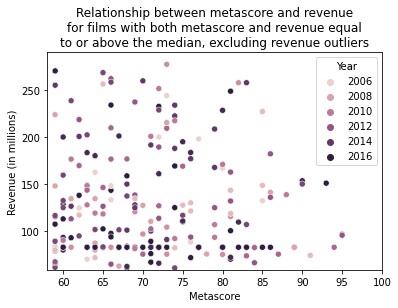

<Figure size 432x288 with 0 Axes>

In [11]:
# Selecting only the movies with both revenue and metascore above the respective
# median values of these variables
# Further excluding the extreme values for revenue as these would make the
# scatterplot overcrowded on lower values and difficult to read
movies_subset = clean_movies[(
    clean_movies.Revenue_Millions >= clean_movies.Revenue_Millions.median())
    & (clean_movies.Revenue_Millions <= clean_movies.Revenue_Millions.quantile(.95))
    & (clean_movies.Metascore >= clean_movies.Metascore.median())
]
# Printing the shape to identify how many rows have been subsetted
print(movies_subset.shape)
# Printing the median for metascore and the median and 95% quantile for revenue
# to decide the lowest limits of the x and y axes
print(clean_movies.Metascore.median(),
      clean_movies.Revenue_Millions.median(),
      clean_movies.Revenue_Millions.quantile(.95))

sbn.scatterplot(x = "Metascore",
               y = "Revenue_Millions",
               data = movies_subset,
               hue = "Year")
# Calling for a plot legend is not necessary as using hue will automatically
# add it 
plt.xlim(58, 100)
# Setting it as 58 - based on the median but avoiding that the points are too
# close to the axes - to 100 - the maximum metascore possible
plt.ylim(59, 290)
# Setting it as 59 - based on the median but avoiding that the points are too
# close to the axes - to 300 - based on the 95% quantile
plt.xlabel("Metascore")
plt.ylabel("Revenue (in millions)")
plt.title("Relationship between metascore and revenue\nfor films with both metascore and revenue equal\nto or above the median, excluding revenue outliers")
plt.show()
plt.clf()

## 7
Use **NumPy** to generate 30 random integers from 0 to 1000. Use the generated 30 integers as indices and extract relative rows from the DataFrame **clean_movies**.

Draw a chart to present the relationship between **Year** and **Votes**. Please use **Year** as the x-axis and **Votes** as the y-axis. The range of the x-axis should be from 2006 to 2016.

[130, 978, 157, 206, 141, 175, 884, 169, 494, 230, 766, 506, 816, 107, 5, 180, 742, 518, 680, 462, 807, 274, 766, 791, 846, 391, 912, 555, 885, 130]
(30, 12)
   Year  Votes
0  2006      2
1  2007      1
2  2009      1
3  2010      1
4  2011      1
5  2012      1
6  2013      6
7  2014      1
8  2015      6
9  2016     10


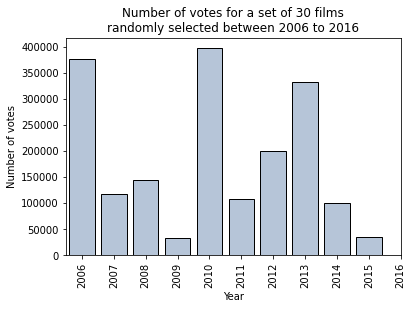

<Figure size 432x288 with 0 Axes>

In [16]:
# Generating 30 integers randomly and assigning them to a list for later
# manipulation
rand_indexes = list(np.random.randint(low = 1, high = 1000, size = 30, dtype = "int"))
# Printing the indices simply for inspection
print(rand_indexes)
# Using a `for` loop to iterate through the DataFrame looking for the rows
# corresponding to the randomly generated indices, and append them to a subset
movies_subset2 = []
for i in rand_indexes:
  movies_subset2.append(clean_movies.iloc[i])
movies_subset2 = pd.DataFrame(movies_subset2)
# Print the shape of the subset to confirm that the DataFrame has as many rows
# as there were integers randomly selected; that is the shape should be (x, 12),
# where x is the number passed to the 'size` argument, line 3
print(movies_subset2.shape)
movies_subset2.head()
votes_per_year = movies_subset2.groupby("Year").Votes.count().reset_index()
print(votes_per_year)

g2 = sbn.barplot(x = "Year", 
           y = "Votes", 
           data = movies_subset2,
           color = "lightsteelblue",
            edgecolor = "black",
           ci = None)
# The below allows to force the x axis to be from 2006 to 2016, even if all years
# are not represented in the subset
tick_labels = ["2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016"]
g2.set_xticks(range(11))
g2.set_xticklabels(tick_labels)
plt.xticks(rotation = "vertical")
plt.xlabel("Year")
plt.ylabel("Number of votes")
plt.title("Number of votes for a set of 30 films\nrandomly selected between 2006 to 2016")
plt.show()
plt.clf()
